<font color='red' size='5px'/> Data Preprocessing<font/>

<font color='blue' size='5px'/> Introduction<font/>

#  Overview 

We have decleared the dataset to be [Dataset](https://iplab.dmi.unict.it/Deepfakechallenge/). Now we want to choose how to perform preprocessing on this dataset. We've decided that we are going to split into two teams each team will be working with different methedology. The first will use Keras and the other will use Albumentations libarary

We want to use Data augmentation techniques to increase the size and diversity of a dataset by applying transformations to the existing data. This helps to prevent overfitting and improves the generalization of the model.

#  Literature Review

## 1 Models Used To detect DeepFake & Datasets

Models:
1. XceptionNet: A deep learning model that is commonly used for deepfake detection, as it has shown high accuracy in identifying manipulated videos.

2. EfficientNet: Another deep learning model that is known for its high efficiency and accuracy in deepfake detection.

3. Capsule-Forensics: A model that uses a capsule network to extract features and identify manipulated videos based on the presence of anomalous patterns.

4. MesoNet: A deep learning model that uses mesoscopic features to identify manipulated videos.

5. FFD-Net: A model that uses a frequency-based approach to identify the presence of deepfake artifacts in manipulated videos.

6. Two-Stream Convolutional Neural Network (CNN): A model that uses a combination of spatial and temporal information to detect deepfake videos.

Datasets:
1. FaceForensics++: A dataset that contains a collection of videos that have been manipulated using different deepfake techniques. The dataset is commonly used for training and evaluating deepfake detection models.

2. DFDNet: A deep learning model that uses a fusion of deep and handcrafted features to detect manipulated videos.

In [2]:
from IPython.display import Image

In [3]:
#Image('The-ameliorated-XceptionNet-architecture.png')

In [4]:
#Image('EfficientNet3D-B0-Architecture.jpg')

## 2 The Face Deepfake Detection Challenge Paper

## 2.1 Introduction

1. Data Collection: The authors collected a large dataset of real and fake face images from various sources, including publicly available datasets and images generated using deepfake techniques.

2. Data Preparation: The dataset was split into training, validation, and testing sets. The authors also applied various data augmentation techniques to increase the size of the training set and improve the generalization of the model.

3. Baseline Model: The authors developed a baseline deep learning model for face detection using a combination of convolutional neural networks (CNNs) and recurrent neural networks (RNNs). The model was trained on the training set and evaluated on the validation set.

4. Challenge: The authors organized a challenge in which participants were asked to develop their own deepfake detection models and submit their results for evaluation. The challenge provided a platform for researchers to compare their methods and identify the most effective techniques.

5. Evaluation: The authors evaluated the performance of the participating models using various metrics, including precision, recall, and F1 score. They also compared the performance of the top-performing models with the baseline model.

## 2.2 Architecture Used

We are going to use the model callled EfficientNet with it's weight when we use ImageNet. We should also stop the Based model from training again and only use the previous weights. The detector was based on EfficientNet,with ImageNet pre-trainedmodel.

- Base Model
  - The model was fine-tuned with a small learning rate,
  - Then the extracted features were fed to the decision module. 

- Decision Model (Output Layer)
  - In the decision module, the extracted
  features are obtained by a fully connected layer with output size 1024, and ReLU activation.
  - To avoid overfitting, a dropout layer was added before the last fully connected
  layer. Sigmoid activation is used to return binary classification

  - Participants used the Adam optimizer, with an initial learning rate of 10^-4
  - The learning rate was reduced by a factor of 0.1 if the validation loss did not decrease after five epochs.
  - The last layer’s activation function is Sigmoid, while the loss function is
  Binary Cross-Entropy


- The testing batch sizes were 32, 64 and 128. Classification results achieved using various version of EfficientNet (B0, B4, and B5) and various sizes of the input image patch (64, 128) were reported.

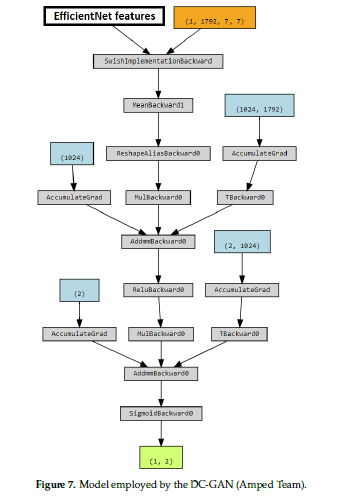

In [28]:
from IPython.display import Image
Image('https://i.postimg.cc/sfLF2QRX/image.png')

<font color='blue' size='5px'/> Implement in Project<font/>

# 1 Packages

In [13]:
!pip install keras-cv-attention-models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.3/617.3 kB 9.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.79.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
apache-beam 2.44.0 

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_datasets as tfds 
from kaggle_datasets import KaggleDatasets

In [16]:
from keras.layers import Input,Dense, Flatten,Dropout,Conv2D,GlobalAveragePooling2D,MaxPool2D
from keras.models import Sequential
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, ZeroPadding2D
from tensorflow.keras.applications import EfficientNetB5
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7
from keras_cv_attention_models import convnext
from keras_cv_attention_models import mobilenetv3

In [17]:
from multiprocessing import cpu_count
from tqdm.notebook import tqdm

In [18]:
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

In [19]:
import os
import PIL
import PIL.Image
import pickle 
import math
import cv2
import datetime
import random
import shutil
import time
import gc
import sys

print(f'Tensorflow Version: {tf.__version__}')
print(f'Python Version: {sys.version}')

Tensorflow Version: 2.11.0
Python Version: 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]


# 2 Explore Data

$$ Train$$

In [23]:
os.listdir('/kaggle/input/fake-images-detecttion-dataset/Albumentations_data-20230318T161556Z-001/Albumentations_data/Train_Data')

## Define the ImageDataGenerator object
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Rescale pixel values between 0 and 1
    rotation_range=30,           # Rotate images by up to 30 degrees
    width_shift_range=0.2,       # Shift images horizontally by up to 20%
    height_shift_range=0.2,      # Shift images vertically by up to 20%
    shear_range=0.2,             # Apply shear transformation
    zoom_range=0.2,              # Zoom in or out by up to 20%
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill any gaps created by transformations with the nearest pixel
)

## Flow from Directory
train_generator=test_datagen.flow_from_directory(
    '/kaggle/input/fake-images-detecttion-dataset/Albumentations_data-20230318T161556Z-001/Albumentations_data/Train_Data',   # Directory containing images
    target_size=(160,160),                                            # Resizes images to 160x160 pixels
    batch_size=32,                                                    # Number of images to include in each batch
    class_mode='categorical'                                               # Generate binary labels (0 or 1)
)

In [20]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/input/fake-images-detecttion-dataset/Keras_Data-20230318T161559Z-001/Keras_Data/Train_Data',
  seed=0,
  image_size=(160, 160),
  batch_size=16)

Found 47995 files belonging to 2 classes.


$$ Val$$

In [ ]:
os.listdir('/kaggle/input/fake-images-detecttion-dataset/Albumentations_data-20230318T161556Z-001/Albumentations_data/Validation_Data')

## Define the ImageDataGenerator object
val_datagen = ImageDataGenerator(
    rescale=1./255,              # Rescale pixel values between 0 and 1
    rotation_range=30,           # Rotate images by up to 30 degrees
    width_shift_range=0.2,       # Shift images horizontally by up to 20%
    height_shift_range=0.2,      # Shift images vertically by up to 20%
    shear_range=0.2,             # Apply shear transformation
    zoom_range=0.2,              # Zoom in or out by up to 20%
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill any gaps created by transformations with the nearest pixel
)

val_generator=test_datagen.flow_from_directory(
    '/kaggle/input/fake-images-detecttion-dataset/Albumentations_data-20230318T161556Z-001/Albumentations_data/Validation_Data',     # Directory containing images
    target_size=(160,160),                                            # Resizes images to 160x160 pixels
    batch_size=32,                                                    # Number of images to include in each batch
    class_mode='categorical'                                               # Generate binary labels (0 or 1)
)

In [21]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/input/fake-images-detecttion-dataset/Keras_Data-20230318T161559Z-001/Keras_Data/Validation_Data',
  seed=0,
  image_size=(160, 160),
  batch_size=8)

Found 6000 files belonging to 2 classes.


$$ Test$$

In [ ]:
os.listdir('/kaggle/input/fake-images-detecttion-dataset/Albumentations_data-20230318T161556Z-001/Albumentations_data/Test_Data')

In [ ]:
## Define the ImageDataGenerator object
test_datagen = ImageDataGenerator(
    rescale=1./255,              # Rescale pixel values between 0 and 1
    rotation_range=30,           # Rotate images by up to 30 degrees
    width_shift_range=0.2,       # Shift images horizontally by up to 20%
    height_shift_range=0.2,      # Shift images vertically by up to 20%
    shear_range=0.2,             # Apply shear transformation
    zoom_range=0.2,              # Zoom in or out by up to 20%
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill any gaps created by transformations with the nearest pixel
)

test_generator=test_datagen.flow_from_directory(
    '/kaggle/input/fake-images-detecttion-dataset/Albumentations_data-20230318T161556Z-001/Albumentations_data/Test_Data',    # Directory containing images
    target_size=(160,160),                                            # Resizes images to 160x160 pixels
    batch_size=32,                                                    # Number of images to include in each batch
    class_mode='categorical'                                               # Generate binary labels (0 or 1)
)

In [22]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/input/fake-images-detecttion-dataset/Keras_Data-20230318T161559Z-001/Keras_Data/Test_Data',
  seed=0,
  image_size=(160, 160),
  batch_size=8)

Found 6001 files belonging to 2 classes.


In [ ]:
AutoTune=tf.data.AUTOTUNE
train_ds=train_ds.prefetch(buffer_size=AutoTune)
val_ds=valid_ds.prefetch(buffer_size=AutoTune)
test_ds= test_ds.prefetch(buffer_size=AutoTune)

# 3 Freature Engineering 

## 3.1 Preprocessing Data

### 3.1.1 Randomize the Input Image

In [24]:
# Seed all random number generators
def seed_everything(seed=0):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything()

### 3.1.2 Normalize the Image to be  similar to Image trained on

In [25]:
def normalize(image):
# Repeat channels to create 3 channel images required by pretrained ConvNextV2 models
# image = tf.repeat(image, repeats=3, axis=3)
    # Repeat channels to create 3 channel images required by pretrained ConvNextV2 models
    # image=tf.repeat(image,repeats=3,axis=3)
    # Cast to float32
    image=tf.cast(image,tf.float32)
    #Normalize with respect to ImageNet Mean
    image=tf.keras.applications.imagenet_utils.preprocess_input(image,mode='torch')
    return image

In [26]:
STRATEGY=tf.distribute.MirroredStrategy()
N_REPLICAS=STRATEGY.num_replicas_in_sync

In [27]:
N_REPLICAS

2

## 3.2 Feature Extraction

During training we will use EfficientNet for that

## 3.3 Dimensionality Reduction

We will use Pooling in Training

# 4 Preprocessing

We will split data and normalize it at the same time using ImageGenerator. Adding to that we will introduce some variation. The class will be defined based on class_mode from flow_from_directory fn

# 5 Training

## 5.1 Input Parameters

In [ ]:
N_EPOCHS=3
VERBOSE=1
N_REPLICAS=2
LR_MAX=5e-6 * N_REPLICAS
WD_RATIO=1e-5
N_WARMUP_EPOCHS=0

## 5.2 Weight Decay Function

In [42]:
# Tensorflow Learning Rate Scheduler does not update weight decay, need to do it manually in a custom callback
class WeightDecayCallback(tf.keras.callbacks.Callback):
    def __init__(self, wd_ratio=WD_RATIO):
        self.step_counter = 0
        self.wd_ratio = wd_ratio
    
    def on_epoch_begin(self, epoch, logs=None):
        model.optimizer.weight_decay = model.optimizer.learning_rate * self.wd_ratio
        print(f'learning rate: {model.optimizer.learning_rate.numpy():.2e}, weight decay: {model.optimizer.weight_decay.numpy():.2e}')

## 5.3 Learning Rate Function

In [43]:
# Learning rate scheduler with logaritmic warmup and cosine decay
def lrfn(current_step, num_warmup_steps, lr_max, num_cycles=0.50, num_training_steps=N_EPOCHS):
    
    if current_step < num_warmup_steps:
        return lr_max * 0.10 ** (num_warmup_steps - current_step)
    else:
        progress = float(current_step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))

        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * float(num_cycles) * 2.0 * progress))) * lr_max

In [46]:
LR_SCHEDULE = [lrfn(step, num_warmup_steps= N_WARMUP_EPOCHS, lr_max=LR_MAX, num_cycles=.5) for step in range(N_EPOCHS)]
lr_callback=tf.keras.callbacks.LearningRateScheduler(lambda step: LR_SCHEDULE[step],verbose=0)

## 5.4 EfficientNetB5 & ImageNet Base Model


In [32]:
def get_model():
    # Verify Mixed Policy settings
    # Print('f'compute dtype)
    
    INPUT_SHAPE=(160,160,3)
    
    with STRATEGY.scope():
        # Set seed for deterministic weights intializations
        seed_everything()
        
        # Input, note the names are equal to directory keys in dataset
        image=tf.keras.layers.Input(INPUT_SHAPE, name='image',dtype=tf.uint8)
        
        
        # Nomalize Input
        image_norm=normalize(image)
        
        # CNN Prediciton in range [0,1]
        x = EfficientNetB5(weights='imagenet',include_top=False,input_shape=[160,160,3])(image_norm)
        
            ##'imagenet21k-ft1k',imagenet21k-ftlk'
        
        
        
        # Average Pooling BxhxNxC -> BxC
        x=GlobalAveragePooling2D()(x)
        # Dropout 
        x=Dropout(.5)(x) #
        # Output sigmoid
        outputs=Dense(1,activation='sigmoid')(x)
        
        
        ## We will use Adam optimizer for fast learning with weight decap
        optimizer=tfa.optimizers.AdamW(learning_rate=LR_MAX,weight_decay=LR_MAX*WD_RATIO,epsilon=1e-6)
        
        ## Loss
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False)
        
        
        ## Metrics
        metrics= [tfa.metrics.F1Score(num_classes=1),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.BinaryAccuracy()]
        
        model=Model(inputs=image,outputs=outputs)
        
        model.compile(optimizer=optimizer,loss=loss,metrics=metrics)
        
        return model


In [34]:
LR_SCHEDULE = [lrfn(step, num_warmup_steps= N_WARMUP_EPOCHS, lr_max=LR_MAX, num_cycles=.5) for step in range(N_EPOCHS)]
lr_callback=tf.keras.callbacks.LearningRateScheduler(lambda step: LR_SCHEDULE[step],verbose=0)
model=get_model()

115263384/115263384 [==============================] - 1s 0us/step


In [35]:
history=model.fit(train_ds,
                  validation_data=valid_ds,
                  epochs=N_EPOCHS,
                  verbose=VERBOSE,
                  callbacks=[lr_callback,
                             WeightDecayCallback()])

learning rate: 1.00e-05, weight decay: 1.00e-10
Epoch 1/3


2023-04-01 00:12:44.432960: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb5/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


3000/3000 [==============================] - 960s 287ms/step - loss: 0.5234 - f1_score: 0.6667 - precision: 0.7272 - recall: 0.7384 - auc: 0.8145 - binary_accuracy: 0.7307 - val_loss: 0.3554 - val_f1_score: 0.6667 - val_precision: 0.8892 - val_recall: 0.8217 - val_auc: 0.9367 - val_binary_accuracy: 0.8597 - lr: 1.0000e-05
learning rate: 7.50e-06, weight decay: 7.50e-11
Epoch 2/3
3000/3000 [==============================] - 828s 276ms/step - loss: 0.3615 - f1_score: 0.6667 - precision: 0.8436 - recall: 0.8488 - auc: 0.9193 - binary_accuracy: 0.8457 - val_loss: 0.2836 - val_f1_score: 0.6667 - val_precision: 0.9368 - val_recall: 0.8353 - val_auc: 0.9633 - val_binary_accuracy: 0.8895 - lr: 7.5000e-06
learning rate: 2.50e-06, weight decay: 2.50e-11
Epoch 3/3
3000/3000 [==============================] - 824s 275ms/step - loss: 0.3131 - f1_score: 0.6667 - precision: 0.8656 - recall: 0.8701 - auc: 0.9400 - binary_accuracy: 0.8675 - val_loss: 0.2577 - val_f1_score: 0.6667 - val_precision: 0.933

In [ ]:
#Base_model = VGG16(input_shape=[160,160,3], weights='imagenet', include_top=False)

In [ ]:
# Add a Swish activation layer
#swish_activation = Activation('swish')(Base_model.output)


## Add Pooling layer
#L=GlobalAveragePooling2D()(Base_model.output)

## Add Fully connected Layer
#L=Dense(1024,activation='relu')(L)



## Add Dropout to stop overfitting
#L=Dropout(.5)(L)
#
## Output layer
#output=Dense(2,activation='sigmoid')(L)

In [29]:
#x = Flatten()(Base_model.output)
#outputs = Dense(2, activation= 'softmax')(x)

## 5.5 EfficientNetB5 & ImageNet Base Model (Paper Architecture)


In [44]:

def get_model():
    # Verify Mixed Policy settings
    # Print('f'compute dtype)
    
    INPUT_SHAPE=(160,160,3)
    
    with STRATEGY.scope():
        # Set seed for deterministic weights intializations
        seed_everything()
        
        # Input, note the names are equal to directory keys in dataset
        image=tf.keras.layers.Input(INPUT_SHAPE, name='image',dtype=tf.uint8)
        
        
        # Nomalize Input
        image_norm=normalize(image)
        
        # CNN Prediciton in range [0,1]
        x = EfficientNetB5(weights='imagenet',include_top=False,input_shape=[160,160,3])(image_norm)
        
        x = GlobalAveragePooling2D()(x)
        x = Dense(512, activation='relu')(x)
        x = Dropout(0.5)(x)
        x = Dense(128, activation='relu')(x)
        x = Dropout(0.5)(x)


        outputs=Dense(1,activation='sigmoid')(x)
        
        
        ## We will use Adam optimizer for fast learning with weight decap
        optimizer=tfa.optimizers.AdamW(learning_rate=LR_MAX,weight_decay=LR_MAX*WD_RATIO,epsilon=1e-6)
        
        ## Loss
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False)
        
        
        ## Metrics
        metrics= [tfa.metrics.F1Score(num_classes=1),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.BinaryAccuracy()]
        
        model=Model(inputs=image,outputs=outputs)
        
        model.compile(optimizer=optimizer,loss=loss,metrics=metrics)
        
        return model


In [49]:
model=get_model()
history=model.fit(train_ds,
                  validation_data=valid_ds,
                  epochs=N_EPOCHS,
                  verbose=VERBOSE,
                  callbacks=[lr_callback,
                             WeightDecayCallback()])

learning rate: 1.00e-05, weight decay: 1.00e-10
Epoch 1/3


2023-04-01 02:31:57.759456: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_4/efficientnetb5/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


3000/3000 [==============================] - 943s 286ms/step - loss: 0.5867 - f1_score: 0.6667 - precision_4: 0.6595 - recall_4: 0.7124 - auc_4: 0.7496 - binary_accuracy: 0.6723 - val_loss: 0.4066 - val_f1_score: 0.6667 - val_precision_4: 0.8731 - val_recall_4: 0.8093 - val_auc_4: 0.9199 - val_binary_accuracy: 0.8458 - lr: 1.0000e-05
learning rate: 7.50e-06, weight decay: 7.50e-11
Epoch 2/3
3000/3000 [==============================] - 846s 282ms/step - loss: 0.4066 - f1_score: 0.6667 - precision_4: 0.8196 - recall_4: 0.8295 - auc_4: 0.8978 - binary_accuracy: 0.8235 - val_loss: 0.3150 - val_f1_score: 0.6667 - val_precision_4: 0.9303 - val_recall_4: 0.8180 - val_auc_4: 0.9562 - val_binary_accuracy: 0.8783 - lr: 7.5000e-06
learning rate: 2.50e-06, weight decay: 2.50e-11
Epoch 3/3
3000/3000 [==============================] - 851s 283ms/step - loss: 0.3497 - f1_score: 0.6667 - precision_4: 0.8516 - recall_4: 0.8545 - auc_4: 0.9253 - binary_accuracy: 0.8528 - val_loss: 0.2831 - val_f1_score:

## 5.6 EfficientNetB7 & ImageNet Base Model (paper Architecture)


In [56]:
def get_model():
    # Verify Mixed Policy settings
    # Print('f'compute dtype)
    
    INPUT_SHAPE=(160,160,3)
    
    with STRATEGY.scope():
        # Set seed for deterministic weights intializations
        seed_everything()
        
        # Input, note the names are equal to directory keys in dataset
        image=tf.keras.layers.Input(INPUT_SHAPE, name='image',dtype=tf.uint8)
        
        
        # Nomalize Input
        image_norm=normalize(image)
        
        # CNN Prediciton in range [0,1]
        x = EfficientNetB7(weights='imagenet',include_top=False,input_shape=[160,160,3])(image_norm)
        
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        x = Dropout(0.5)(x)


        outputs=Dense(1,activation='sigmoid')(x)
        
        
        ## We will use Adam optimizer for fast learning with weight decap
        optimizer=tfa.optimizers.AdamW(learning_rate=LR_MAX,weight_decay=LR_MAX*WD_RATIO,epsilon=1e-6)
        
        ## Loss
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False)
        
        
        ## Metrics
        metrics= [tfa.metrics.F1Score(num_classes=1),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.BinaryAccuracy()]
        
        model=Model(inputs=image,outputs=outputs)
        
        model.compile(optimizer=optimizer,loss=loss,metrics=metrics)
        
        return model


258076736/258076736 [==============================] - 4s 0us/step
learning rate: 1.00e-05, weight decay: 1.00e-10
Epoch 1/3


2023-04-01 03:38:59.419651: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_5/efficientnetb7/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


3000/3000 [==============================] - 1450s 442ms/step - loss: 0.4874 - f1_score: 0.6667 - precision_5: 0.7501 - recall_5: 0.7730 - auc_5: 0.8438 - binary_accuracy: 0.7577 - val_loss: 0.3051 - val_f1_score: 0.6667 - val_precision_5: 0.9071 - val_recall_5: 0.8630 - val_auc_5: 0.9532 - val_binary_accuracy: 0.8873 - lr: 1.0000e-05
learning rate: 7.50e-06, weight decay: 7.50e-11
Epoch 2/3
3000/3000 [==============================] - 1318s 439ms/step - loss: 0.3159 - f1_score: 0.6667 - precision_5: 0.8657 - recall_5: 0.8664 - auc_5: 0.9389 - binary_accuracy: 0.8660 - val_loss: 0.2232 - val_f1_score: 0.6667 - val_precision_5: 0.9364 - val_recall_5: 0.8987 - val_auc_5: 0.9730 - val_binary_accuracy: 0.9188 - lr: 7.5000e-06
learning rate: 2.50e-06, weight decay: 2.50e-11
Epoch 3/3
3000/3000 [==============================] - 1315s 438ms/step - loss: 0.2539 - f1_score: 0.6667 - precision_5: 0.8941 - recall_5: 0.8984 - auc_5: 0.9608 - binary_accuracy: 0.8960 - val_loss: 0.2038 - val_f1_sco

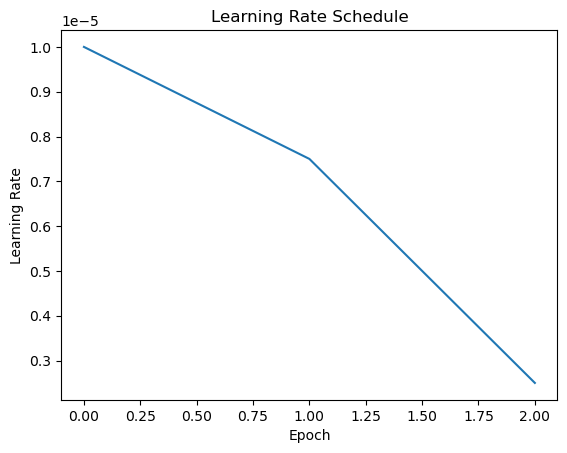

In [57]:
model=get_model()
history=model.fit(train_ds,
                  validation_data=valid_ds,
                  epochs=N_EPOCHS,
                  verbose=VERBOSE,
                  callbacks=[lr_callback,
                             WeightDecayCallback()])
plt.plot(LR_SCHEDULE)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()

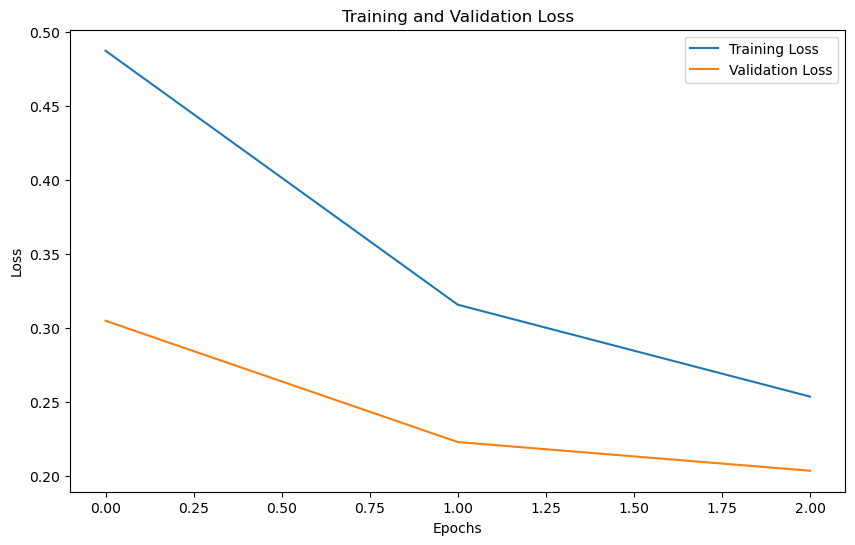

In [64]:
# Get training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']


# Plot the loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 6 Prediction

## 6.1 EfficientNetB7 & ImageNet Base Model


In [39]:
y_pred= []
y_test= []

for image_batch, label_batch in test_ds:
    # apppend True Labels
    y_test.append(label_batch)
    # Compute Predictions
    preds=model.predict(image_batch)
    ## Append Preiction labels
    preds[preds<=.5]=0
    preds[preds>.5]=1
    y_pred.append(preds)
    # convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_test], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 [==============================] - 0s 166ms/step


## 6.2 EfficientNetB5 (Paper Architecture)

In [50]:
y_pred= []
y_test= []

for image_batch, label_batch in test_ds:
    # apppend True Labels
    y_test.append(label_batch)
    # Compute Predictions
    preds=model.predict(image_batch)
    ## Append Preiction labels
    preds[preds<=.5]=0
    preds[preds>.5]=1
    y_pred.append(preds)
    # convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_test], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 [==============================] - 0s 156ms/step


## 6.3 EfficientNetB7 (Paper Architecture)

In [65]:
y_pred= []
y_test= []

for image_batch, label_batch in test_ds:
    # apppend True Labels
    y_test.append(label_batch)
    # Compute Predictions
    preds=model.predict(image_batch)
    ## Append Preiction labels
    preds[preds<=.5]=0
    preds[preds>.5]=1
    y_pred.append(preds)
    # convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_test], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 [==============================] - 1s 1s/step


# 7 Evaluation

## 7.1 EfficientNetB5

In [51]:
model.evaluate(test_ds)

751/751 [==============================] - 48s 64ms/step - loss: 0.2815 - f1_score: 0.6666 - precision_4: 0.9172 - recall_4: 0.8750 - auc_4: 0.9632 - binary_accuracy: 0.8980


[0.2815365195274353,
 array([0.6665926], dtype=float32),
 0.9171907901763916,
 0.875,
 0.9631950855255127,
 0.8980169892311096]

In [52]:
from sklearn.metrics import classification_report
classification_report(correct_labels.numpy(), predicted_labels.numpy())

'              precision    recall  f1-score   support\n\n           0       0.88      0.92      0.90      3001\n           1       0.92      0.87      0.89      3000\n\n    accuracy                           0.90      6001\n   macro avg       0.90      0.90      0.90      6001\nweighted avg       0.90      0.90      0.90      6001\n'

In [ ]:
model.save_weights('DF_EfficientB5_90.h5')

## 7.2 EfficientNetB5(Paper Architecture)

In [53]:
model.evaluate(test_ds)

751/751 [==============================] - 50s 66ms/step - loss: 0.2817 - f1_score: 0.6666 - precision_4: 0.9187 - recall_4: 0.8733 - auc_4: 0.9632 - binary_accuracy: 0.8980


[0.28169378638267517,
 array([0.6665926], dtype=float32),
 0.9186535477638245,
 0.8733333349227905,
 0.963158905506134,
 0.8980169892311096]

In [54]:
from sklearn.metrics import classification_report
classification_report(correct_labels.numpy(), predicted_labels.numpy())

'              precision    recall  f1-score   support\n\n           0       0.88      0.92      0.90      3001\n           1       0.92      0.87      0.89      3000\n\n    accuracy                           0.90      6001\n   macro avg       0.90      0.90      0.90      6001\nweighted avg       0.90      0.90      0.90      6001\n'

In [55]:
model.save_weights('DF_EfficientB5_88.h5')

## 7.3 EfficientNetB7 (Paper Architecture)

In [66]:
model.evaluate(test_ds)

751/751 [==============================] - 64s 84ms/step - loss: 0.1994 - f1_score: 0.6666 - precision_5: 0.9396 - recall_5: 0.9127 - auc_5: 0.9777 - binary_accuracy: 0.9270


[0.19943813979625702,
 array([0.6665926], dtype=float32),
 0.9396018981933594,
 0.9126666784286499,
 0.97771155834198,
 0.9270121455192566]

In [67]:
from sklearn.metrics import classification_report
classification_report(correct_labels.numpy(), predicted_labels.numpy())

'              precision    recall  f1-score   support\n\n           0       0.92      0.94      0.93      3001\n           1       0.94      0.91      0.93      3000\n\n    accuracy                           0.93      6001\n   macro avg       0.93      0.93      0.93      6001\nweighted avg       0.93      0.93      0.93      6001\n'

In [58]:
model.save_weights('DF_EfficientB7_92.5.h5')

# 8 New Information

## 8.1 ImageDataGenerator

In the example below,
 
- We first define an ImageDataGenerator object datagen with various image transformation options.

- Then we define the directory containing our training images and create a generator train_generator that reads images from the directory and applies the transformations defined in datagen.

- We specify that we want to generate binary labels (0 or 1) using the class_mode parameter.

- Finally, we use train_generator to train our model using the fit method. The fit method will automatically read images from train_generator in batches, apply the specified transformations, and feed them to the model for training.

- When you use the flow_from_directory method of the ImageDataGenerator class, it reads images from the specified directory, preprocesses them based on the arguments you passed to the ImageDataGenerator, and returns an iterator that yields batches of image arrays and corresponding labels.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator object
datagen = ImageDataGenerator(
    rescale=1./255,              # Rescale pixel values between 0 and 1
    rotation_range=30,           # Rotate images by up to 30 degrees
    width_shift_range=0.2,       # Shift images horizontally by up to 20%
    height_shift_range=0.2,      # Shift images vertically by up to 20%
    shear_range=0.2,             # Apply shear transformation
    zoom_range=0.2,              # Zoom in or out by up to 20%
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill any gaps created by transformations with the nearest pixel
)

# Define the directory containing your images
train_dir = 'path/to/train/directory'

# Create a generator that reads images from the directory and applies the transformations defined above
train_generator = datagen.flow_from_directory(
    train_dir,                  # Directory containing images
    target_size=(224, 224),     # Resizes images to 224x224 pixels
    batch_size=32,              # Number of images to include in each batch
    class_mode='binary'         # Generate binary labels (0 or 1)
)

# Train your model using the generator
model.fit(train_generator, epochs=10)

## 8.2 Transfer Learning Basics

In [3]:
## base_model.trainable = False

- Is a statement that freezes the layers of the base_model and makes them non-trainable during the subsequent training process.

- When a pre-trained model such as EfficientNetB7 is used, the weights of the model have already been trained on a large dataset (in the case of EfficientNetB7, on the ImageNet dataset), and these weights contain valuable information that can be useful for other similar tasks. 
- By freezing the pre-trained layers, we prevent the optimizer from modifying these weights during training, so we can use them as a fixed feature extractor for our specific task.


In [2]:
## include_top=False

- is an argument in the Keras EfficientNetB7 model constructor that specifies whether or not to include the fully connected layer at the top of the network.

- When include_top is set to True, the default, the fully connected layer is included in the model. This layer is responsible for mapping the features learned by the convolutional layers to the specific output classes of the model.

- When include_top is set to False, the fully connected layer is not included in the model.

In [ ]:
## model = tf.keras.models.Model(inputs=base_model.input, outputs=output) 

- Is a statement that creates a new Keras Model object by specifying the inputs and outputs of the model.

- The inputs argument specifies the input tensor(s) of the model. In this case, base_model.input is used as the input tensor, which is the input to the first layer of the pre-trained EfficientNetB7 model.

- The outputs argument specifies the output tensor(s) of the model. In this case, output is used as the output tensor, which is the output of the custom output layer that we added.


## 8.3 ModelCheckPoint

ModelCheckpoint is a callback in Keras that allows you to save the weights of your model at specified intervals during training. 
- This is useful because it allows you to monitor the progress of your model over time and, in the event that your training is interrupted or crashes, you can resume training from the last saved checkpoint rather than starting over from scratch.

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the file path for the saved model
filepath = "model_weights.h5"

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath,                   # File path for the saved model
    monitor='val_loss',         # Quantity to monitor (e.g. validation loss)
    save_best_only=True,        # Save only the best model based on the monitored quantity
    mode='min',                 # Minimize the monitored quantity (e.g. validation loss)
    verbose=1                   # Show progress updates
)

# Train the model and specify ModelCheckpoint as a callback
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[checkpoint]
)

KeyboardInterrupt: 

During training, ModelCheckpoint will save the model to filepath whenever the monitored quantity meets the specified conditions. By default, ModelCheckpoint will save the entire model, including the architecture and optimizer state, but you can also choose to save only the weights or only the architecture by passing in additional parameters to the ModelCheckpoint constructor

We then train our model using the fit method, and include checkpoint as a callback by passing it in as an element of a list of callbacks.
- In this example, we define the file path for the saved model as filepath. We then define the ModelCheckpoint callback by passing in various parameters:

- filepath: the file path for the saved model
monitor: the quantity to monitor during training. 
- In this example, we monitor the validation loss using 'val_loss'.
- save_best_only: if True, the callback will only save the best model based on the monitored quantity. In this example, we only save the model if the validation loss is the lowest so far.
- mode: specifies whether to minimize or maximize the monitored quantity. In this example, we want to minimize the validation loss, so we set mode='min'.
- verbose: specifies how much progress information to display during training.


.

## 8.3.1 CheckPoint in Project

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='DF_Best_model.h5',
                             verbose=1,
                             save_best_only=True,
                             monitor='val_loss'
                             )



start = datetime.now()

DF_model_history = DF_model.fit(
    train_generator,
    validation_data= val_generator,
    epochs=10,
    verbose=2
    )

duration = datetime.now() - start
print("training completed in time: ", duration)

## 8.4 Class In python


In object-oriented programming, a class is a blueprint or a template for creating objects that define a set of attributes and methods that the objects can have. 
- Attributes are the properties of an object,
- Methods are the functions or operations that the object can perform.
- A constructor in Python is a special method within a class 
    - It is called when an object of that class is instantiated (created). 
    - The constructor method is used to initialize the attributes of an object.
    - The constructor is used to provide default values for the object's attributes or to accept values that are passed as arguments during the object creation process. 
    - In Python, the constructor method is denoted by the __init__() method. When an object is created, this method is automatically called, and any parameters passed to the object are passed to the constructor as arguments.


- A class can be thought of as a user-defined data type that encapsulates both data and functions.
- By defining a class, we can create objects of that class, which can be used to store data and perform operations on that data.

To create a class in Python,:
- First, you can use the class keyword followed by the name of the class, starting with an uppercase letter. 
- We will use a constructor (__init__) to intialize two arguments
- We will create BankAccount, which is a class that has an account_number and balance attribute, as well as methods to deposit, withdraw, and get the account balance.
- We will create an instance of that class (Input some variables)

In [10]:
class BankAccount:
    
    def __init__(self, account_number, balance):
        self.account_number = account_number
        self.balance = balance
        
    def deposit(self, amount):
        self.balance += amount
        print(f"Deposited {amount} into account {self.account_number}")
        
    def withdraw(self, amount):
        if amount > self.balance:
            print("Insufficient funds")
        else:
            self.balance -= amount
            print(f"Withdrew {amount} from account {self.account_number}")
            
    def get_balance(self):
        print(f"Account {self.account_number} balance: {self.balance}")

In [11]:
account1 = BankAccount("12345", 1000)

In [12]:
account1.deposit(500)
account1.withdraw(200)
account1.get_balance()

Deposited 500 into account 12345
Withdrew 200 from account 12345
Account 12345 balance: 1300


## 8.5 Decay In Weights

Weight decay is a regularization technique used in machine learning to prevent overfitting. It works by adding a penalty term to the loss function of the model during training, which encourages the model to have smaller weights. 
- This penalty term is proportional to the L2 norm of the weights, so it is also known as L2 regularization.

- This helps to prevent overfitting by reducing the complexity of the model and making it less sensitive to noise in the training data.

In [ ]:
class WeightDecayCallback(tf.keras.callbacks.Callback):
    def __init__(self, wd_ratio=WD_RATIO):
        self.step_counter = 0
        self.wd_ratio = wd_ratio
    
    def on_epoch_begin(self, epoch, logs=None):
        model.optimizer.weight_decay = model.optimizer.learning_rate * self.wd_ratio
        print(f'learning rate: {model.optimizer.learning_rate.numpy():.2e}, weight decay: {model.optimizer.weight_decay.numpy():.2e}')

The on_epoch_begin method: The method calculates the weight decay value based on the current learning rate and the wd_ratio, and sets it in the optimizer. It also prints the current learning rate and weight decay values.
- This callback function is called at the beginning of each epoch during training.
- It takes the current epoch number and a logs dictionary as arguments (which are provided by Keras). 
- By setting the default value of logs to None, the callback can handle cases where the metrics dictionary is not passed or is empty. This ensures that the callback will not raise an error due to missing data.


## 8.6 Learning Rate Schedules

The learning rate is the step size that the optimizer takes to update the weights during training, and it determines how fast or slow the model learns.
- If the learning rate is too high, the model might overshoot the optimal weights and fail to converge
- If the learning rate is too low, the model might take too long to converge and get stuck in a suboptimal solution.

### 8.6.1 Learning Rate Schedules 

Learning rate schedules provide a way to adjust the learning rate during training to find the right balance between convergence speed and accuracy. 
- For example, we can start with a high learning rate to make the model converge quickly, and then reduce it gradually to fine-tune the weights and improve the accuracy. 
- We can also use more complex schedules such as:
    - cosine annealing,
    - step decay, 
    - adaptive methods such as Adam that adjust the learning rate based on the gradient and other factors.

### 8.6.2 Example 

- We will use warmup period at the beginning 
    - Warmup period is an initial phase in the training process where the learning rate is gradually increased from a small value to a larger value over a certain number of steps or epochs.
    - The purpose of this warmup period is to allow the model to stabilize and adjust to the new learning rate before the learning rate is increased to a larger value. 
    - This can help prevent the model from becoming unstable or overfitting during the early stages of training, especially when using high learning rates.

- We will use cosine decay adding to with number of cycles
    -  if NUM_CYCLES is set to 0.5, the learning rate will perform a half cycle of cosine decay from the maximum learning rate to 0, and then increase back to the maximum learning rate in the second half cycle.

In [ ]:
import tensorflow as tf
import math

def lr_schedule(epoch, lr, num_epochs=N_EPOCHS, num_cycles=0.5, lr_max=LR_MAX, lr_min=LR_MIN):
    progress = epoch / num_epochs
    cosine_decay = 0.5 * (1 + math.cos(math.pi * progress * num_cycles))
    decayed_lr = (lr_max - lr_min) * cosine_decay + lr_min
    return decayed_lr / math.log(10) # Apply logarithmic scaling to learning rate

callbacks = [
    tf.keras.callbacks.LearningRateScheduler(lr_schedule),
    # Other callbacks...
]

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

model.fit(train_dataset, epochs=N_EPOCHS, callbacks=callbacks)

In [ ]:
# Learning rate scheduler with logaritmic warmup and cosine decay
def lrfn(current_step, num_warmup_steps, lr_max, num_cycles=0.50, num_training_steps=N_EPOCHS):
    
    if current_step < num_warmup_steps:
        return lr_max * 0.10 ** (num_warmup_steps - current_step)
    else:
        progress = float(current_step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))

        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * float(num_cycles) * 2.0 * progress))) * lr_max

In [ ]:
LR_SCHEDULE = [lrfn(step, num_warmup_steps= N_WARMUP_EPOCHS, lr_max=LR_MAX, num_cycles=.5) for step in range(N_EPOCHS)]
lr_callback=tf.keras.callbacks.LearningRateScheduler(lambda step: LR_SCHEDULE[step],verbose=0)
model=get_model()

### 8.6.3 Plot LR during Trainig

In [ ]:
# define the learning rate schedule
def lr_schedule(epoch):
    lr = # calculate the learning rate based on the epoch
    return lr

# create a learning rate callback
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# define the model and compile it with your chosen optimizer and loss function

# train the model with the learning rate callback
history = model.fit(train_data, train_labels, epochs=num_epochs, callbacks=[lr_callback])

# plot the learning rate values for each epoch
lrs = [lr_schedule(epoch) for epoch in range(num_epochs)]
plt.plot(lrs)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()

## 8.7 Cast

Casting is the process of converting a tensor from one data type to another. It can be useful in various scenarios, such as:

- Ensuring consistency of data types across different parts of the code (e.g., model inputs, outputs, and variables).
- Improving numerical stability or reducing memory usage by using lower-precision data types (e.g., tf.float16 or tf.bfloat16).
- Converting data types to match the requirements of a specific operation or model architecture (e.g., some operations only accept certain data types as input).


## 8.8 Normalize Image

We will need to turn the image to a similar shape to the original image that we had in transfer learning
- We will cast image to float 32 
- We will normalize the data based on the mode 'torch', which means the image is normalized using the mean and standard deviation values used by PyTorch models trained on ImageNe
- EfficientNetB7 is a model from google but Pytorch bought it too

In [ ]:
def normalize(image):
    # Cast to float32
    image=tf.cast(image,tf.float32)
    #Normalize with respect to ImageNet Mean
    image=tf.keras.applications.imagenet_utils.preprocess_input(image,mode='torch')
    return image